### Importing the liabraries

In [2]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

### Importing the Data

In [3]:
df=pd.read_csv(r"C:\Users\Y SAI KUMAR\Downloads\spam.csv")

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
ham_words=' '.join( df[df['Category']=='ham']['Message'].values)

In [7]:
ham_words

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

In [8]:
!pip install wordcloud

In [9]:
from wordcloud import WordCloud

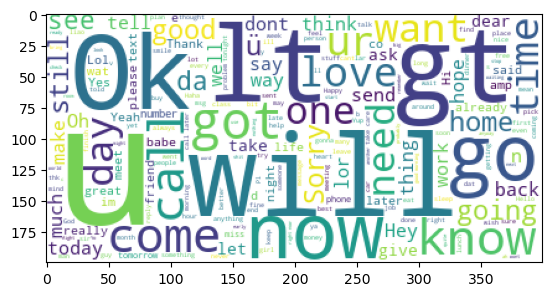

In [10]:
ham_words=' '.join( df[df['Category']=='ham']['Message'].values)
ham_plot =WordCloud(background_color='white').generate(ham_words)
plt.imshow(ham_plot)

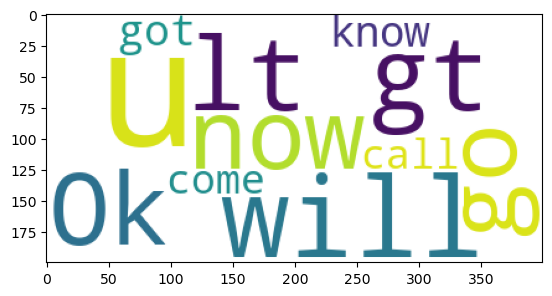

In [11]:
ham_words=' '.join( df[df['Category']=='ham']['Message'].values)
ham_plot =WordCloud(max_words=10,background_color='white').generate(ham_words)
plt.imshow(ham_plot)

### Spam 

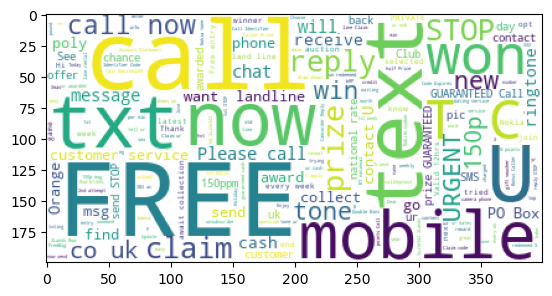

In [12]:
spam_words=' '.join( df[df['Category']=='spam']['Message'].values)
spam_plot =WordCloud(background_color='white').generate(spam_words)
plt.imshow(spam_plot)

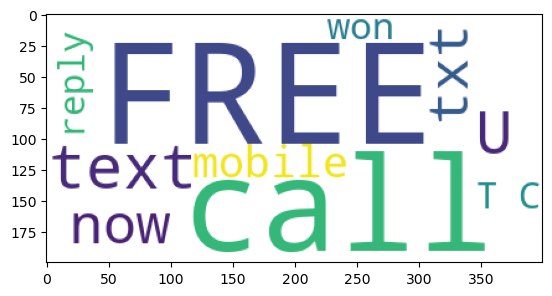

In [13]:
spam_words=' '.join( df[df['Category']=='spam']['Message'].values)
spam_plot =WordCloud(max_words=10,background_color='white').generate(spam_words)
plt.imshow(spam_plot)

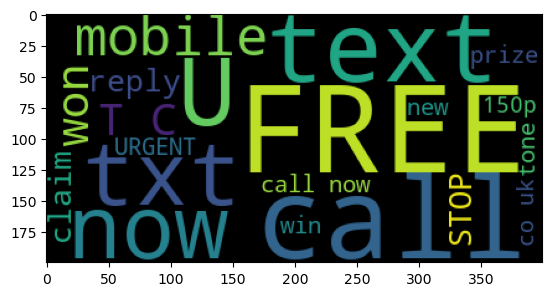

In [14]:
spam_words=' '.join( df[df['Category']=='spam']['Message'].values)
spam_plot =WordCloud(min_font_size=10,max_words=20,background_color='black').generate(spam_words)
plt.imshow(spam_plot)

In [15]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category'>

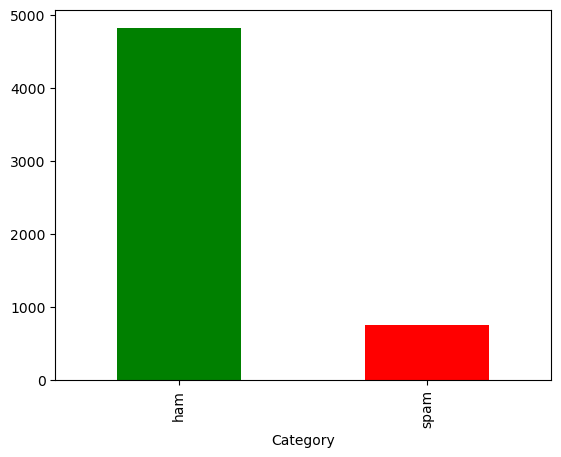

In [16]:
df['Category'].value_counts().plot(kind='bar',color=['green','red'])

### Bag of Words

In [17]:
bow = CountVectorizer(stop_words='english') 

In [18]:
bow.fit(df['Message'])
x=bow.transform(df['Message']).toarray()
y=df['Category']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [21]:
from sklearn.metrics import accuracy_score

### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9210762331838565

### Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9811659192825112

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9739910313901345

### Deployment

In [25]:
email=input("Enter the eamil ID: ")
data=bow.transform([email]).toarray()
nb.predict(data)[0]

Enter the eamil ID: free


'spam'

In [27]:
email=input("Enter the eamil ID: ")
data=bow.transform([email]).toarray()
result=nb.predict(data)[0]
result

Enter the eamil ID: Hi


'ham'

### Pickling

### Naive Bayes

In [65]:
import pickle

In [66]:
pickle.dump(nb,open("nb.pkl","wb"))

In [67]:
model= pickle.load(open("nb.pkl","rb"))

### Bow

In [85]:
bow = CountVectorizer(stop_words='english') 
bow.fit(df['Message'])
x=bow.transform(df['Message']).toarray()
with open('count_vectorizer.pkl', 'wb') as bow_file:
    pickle.dump(bow, bow_file)


In [29]:
import scikit.learn

ModuleNotFoundError: No module named 'scikit'